Grand Canonical Monte Carlo Method is a used to solve complex molecular dynamic simulation.
u, V, T is constant, therefore the Number of Particles N become the main parameter.

In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

Writing the simulation script + Plotting Graph

Final number of particles: 51
Final system energy: 1242.37964507507


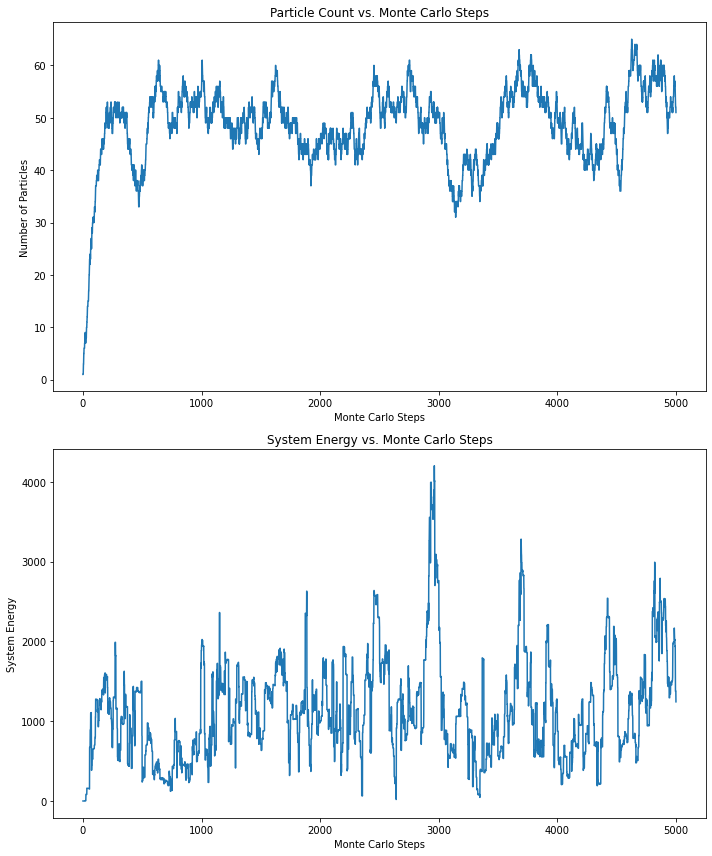

In [7]:
class GCMCSimulation:
    def __init__(self, volume, temperature, chemical_potential, max_particles):
        self.volume = volume
        self.temperature = temperature
        self.chemical_potential = chemical_potential
        self.max_particles = max_particles
        self.particles = []
        self.energy = 0

    def lennard_jones_potential(self, r):
        epsilon = 1.0  # Energy parameter
        sigma = 1.0    # Distance parameter
        return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

    def calculate_total_energy(self):
        total_energy = 0
        for i in range(len(self.particles)):
            for j in range(i + 1, len(self.particles)):
                r = np.linalg.norm(self.particles[i] - self.particles[j])
                total_energy += self.lennard_jones_potential(r)
        return total_energy

    def attempt_insertion(self):
        if len(self.particles) >= self.max_particles:
            return False

        new_particle = np.random.rand(3) * self.volume**(1/3)
        delta_energy = sum(self.lennard_jones_potential(np.linalg.norm(new_particle - p)) for p in self.particles)
        
        acceptance_probability = (self.volume / (len(self.particles) + 1)) * np.exp(-(delta_energy - self.chemical_potential) / self.temperature)
        
        if random.random() < acceptance_probability:
            self.particles.append(new_particle)
            self.energy += delta_energy
            return True
        return False

    def attempt_deletion(self):
        if not self.particles:
            return False

        particle_index = random.randint(0, len(self.particles) - 1)
        particle = self.particles[particle_index]
        delta_energy = -sum(self.lennard_jones_potential(np.linalg.norm(particle - p)) for p in self.particles if not np.array_equal(particle, p))
        
        acceptance_probability = (len(self.particles) / self.volume) * np.exp(-(delta_energy + self.chemical_potential) / self.temperature)
        
        if random.random() < acceptance_probability:
            self.particles.pop(particle_index)
            self.energy += delta_energy
            return True
        return False

    def run_simulation(self, num_steps):
        particle_counts = []
        energies = []
        for _ in range(num_steps):
            if random.random() < 0.5:
                self.attempt_insertion()
            else:
                self.attempt_deletion()
            particle_counts.append(len(self.particles))
            energies.append(self.energy)
        return particle_counts, energies

# Run the simulation
#Parameters
volume = 100
temperature = 300
chemical_potential = -2.0
max_particles = 100 #No matter how high the Nmax is, the Nmean will always be arond 50-60
num_steps = 5000

simulation = GCMCSimulation(volume, temperature, chemical_potential, max_particles)
particle_counts, energies = simulation.run_simulation(num_steps)

print(f"Final number of particles: {particle_counts[-1]}")
print(f"Final system energy: {energies[-1]}")

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot particle count
ax1.plot(range(num_steps), particle_counts)
ax1.set_xlabel('Monte Carlo Steps')
ax1.set_ylabel('Number of Particles')
ax1.set_title('Particle Count vs. Monte Carlo Steps')

# Plot system energy
ax2.plot(range(num_steps), energies)
ax2.set_xlabel('Monte Carlo Steps')
ax2.set_ylabel('System Energy')
ax2.set_title('System Energy vs. Monte Carlo Steps')

plt.tight_layout()
plt.show()

This is a test for 3D model Case

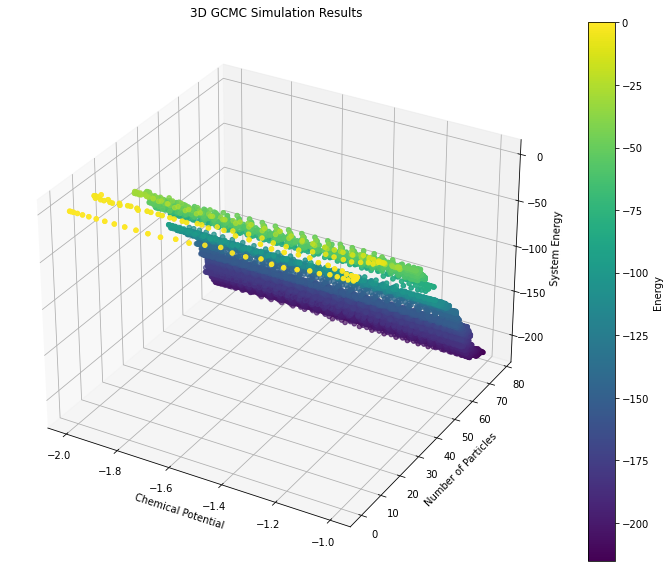

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

class GCMCSimulation:
    def __init__(self, volume, temperature, chemical_potential, max_particles):
        self.volume = volume
        self.temperature = temperature
        self.chemical_potential = chemical_potential
        self.max_particles = max_particles
        self.particles = []
        self.energy = 0

    def lennard_jones_potential(self, r):
        epsilon = 1.0  # Energy parameter
        sigma = 1.0    # Distance parameter
        return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

    def calculate_total_energy(self):
        total_energy = 0
        for i in range(len(self.particles)):
            for j in range(i + 1, len(self.particles)):
                r = np.linalg.norm(self.particles[i] - self.particles[j])
                total_energy += self.lennard_jones_potential(r)
        return total_energy

    def attempt_insertion(self):
        if len(self.particles) >= self.max_particles:
            return False

        new_particle = np.random.rand(3) * self.volume**(1/3)
        delta_energy = sum(self.lennard_jones_potential(np.linalg.norm(new_particle - p)) for p in self.particles)
        
        acceptance_probability = (self.volume / (len(self.particles) + 1)) * np.exp(-(delta_energy - self.chemical_potential) / self.temperature)
        
        if random.random() < acceptance_probability:
            self.particles.append(new_particle)
            self.energy += delta_energy
            return True
        return False

    def attempt_deletion(self):
        if not self.particles:
            return False

        particle_index = random.randint(0, len(self.particles) - 1)
        particle = self.particles[particle_index]
        delta_energy = -sum(self.lennard_jones_potential(np.linalg.norm(particle - p)) for p in self.particles if not np.array_equal(particle, p))
        
        acceptance_probability = (len(self.particles) / self.volume) * np.exp(-(delta_energy + self.chemical_potential) / self.temperature)
        
        if random.random() < acceptance_probability:
            self.particles.pop(particle_index)
            self.energy += delta_energy
            return True
        return False

    def run_simulation(self, num_steps):
        particle_counts = []
        energies = []
        chemical_potentials = []
        for step in range(num_steps):
            if random.random() < 0.5:
                self.attempt_insertion()
            else:
                self.attempt_deletion()
            particle_counts.append(len(self.particles))
            energies.append(self.energy)
            # Vary chemical potential slightly for 3D effect
            self.chemical_potential += np.sin(step * 0.1) * 0.05
            chemical_potentials.append(self.chemical_potential)
        return particle_counts, energies, chemical_potentials

# Run the simulation
volume = 100
temperature = 1.0
initial_chemical_potential = -2.0
max_particles = 100
num_steps = 10000

simulation = GCMCSimulation(volume, temperature, initial_chemical_potential, max_particles)
particle_counts, energies, chemical_potentials = simulation.run_simulation(num_steps)

# 3D Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(chemical_potentials, particle_counts, energies, c=energies, cmap='viridis')
ax.set_xlabel('Chemical Potential')
ax.set_ylabel('Number of Particles')
ax.set_zlabel('System Energy')
ax.set_title('3D GCMC Simulation Results')

plt.colorbar(ax.scatter(chemical_potentials, particle_counts, energies, c=energies, cmap='viridis'), 
             label='Energy', ax=ax)

plt.tight_layout()
plt.show()

###Interactive 3D Graph
# fig = go.Figure(data=[go.Scatter3d(
#     x=chemical_potentials,
#     y=particle_counts,
#     z=energies,
#     mode='markers',
#     marker=dict(
#         size=5,
#         color=energies,
#         colorscale='Viridis',
#         opacity=0.8
#     )
# )])

# fig.update_layout(scene=dict(
#     xaxis_title='Chemical Potential',
#     yaxis_title='Number of Particles',
#     zaxis_title='System Energy'
# ),
# title='Interactive 3D GCMC Simulation Results')

# fig.show()